# Red Wine Data Analysis   

Download Link : https://archive.ics.uci.edu/ml/datasets/wine+quality  

Citation : P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
red_wine_df = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Questions that we can try to answer ?  
- Which factor or combination of factors affect the quality of Red Wine ?
- Is there any interesting trends that exist in other columns besides Quality ?

# Descriptive Statistics

In [5]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
red_wine_df['quality']

0       5
1       5
2       5
3       6
4       5
5       5
6       5
7       7
8       7
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      7
17      5
18      4
19      6
20      6
21      5
22      5
23      5
24      6
25      5
26      5
27      5
28      5
29      6
       ..
1569    6
1570    6
1571    6
1572    5
1573    6
1574    6
1575    6
1576    6
1577    6
1578    6
1579    5
1580    6
1581    5
1582    5
1583    5
1584    7
1585    6
1586    6
1587    6
1588    6
1589    5
1590    6
1591    6
1592    6
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

#### Since there are no null entries, we don't need to deal with missing values. 

### Descriptive Statistics

In [ ]:
red_wine_df.describe()

# Analysis over Red Wine

### Let's first check the Quality Column

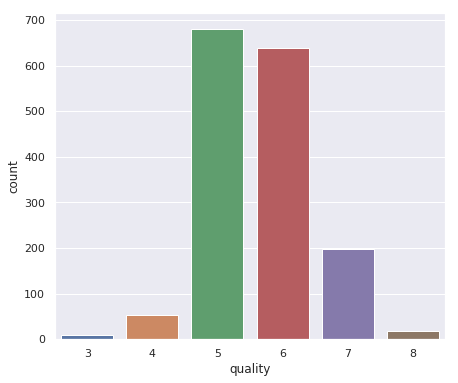

In [8]:
sns.set(rc={'figure.figsize':(7,6)})
sns.countplot(red_wine_df['quality'])

### Lets check which of the other columns are highly correlated to Quality

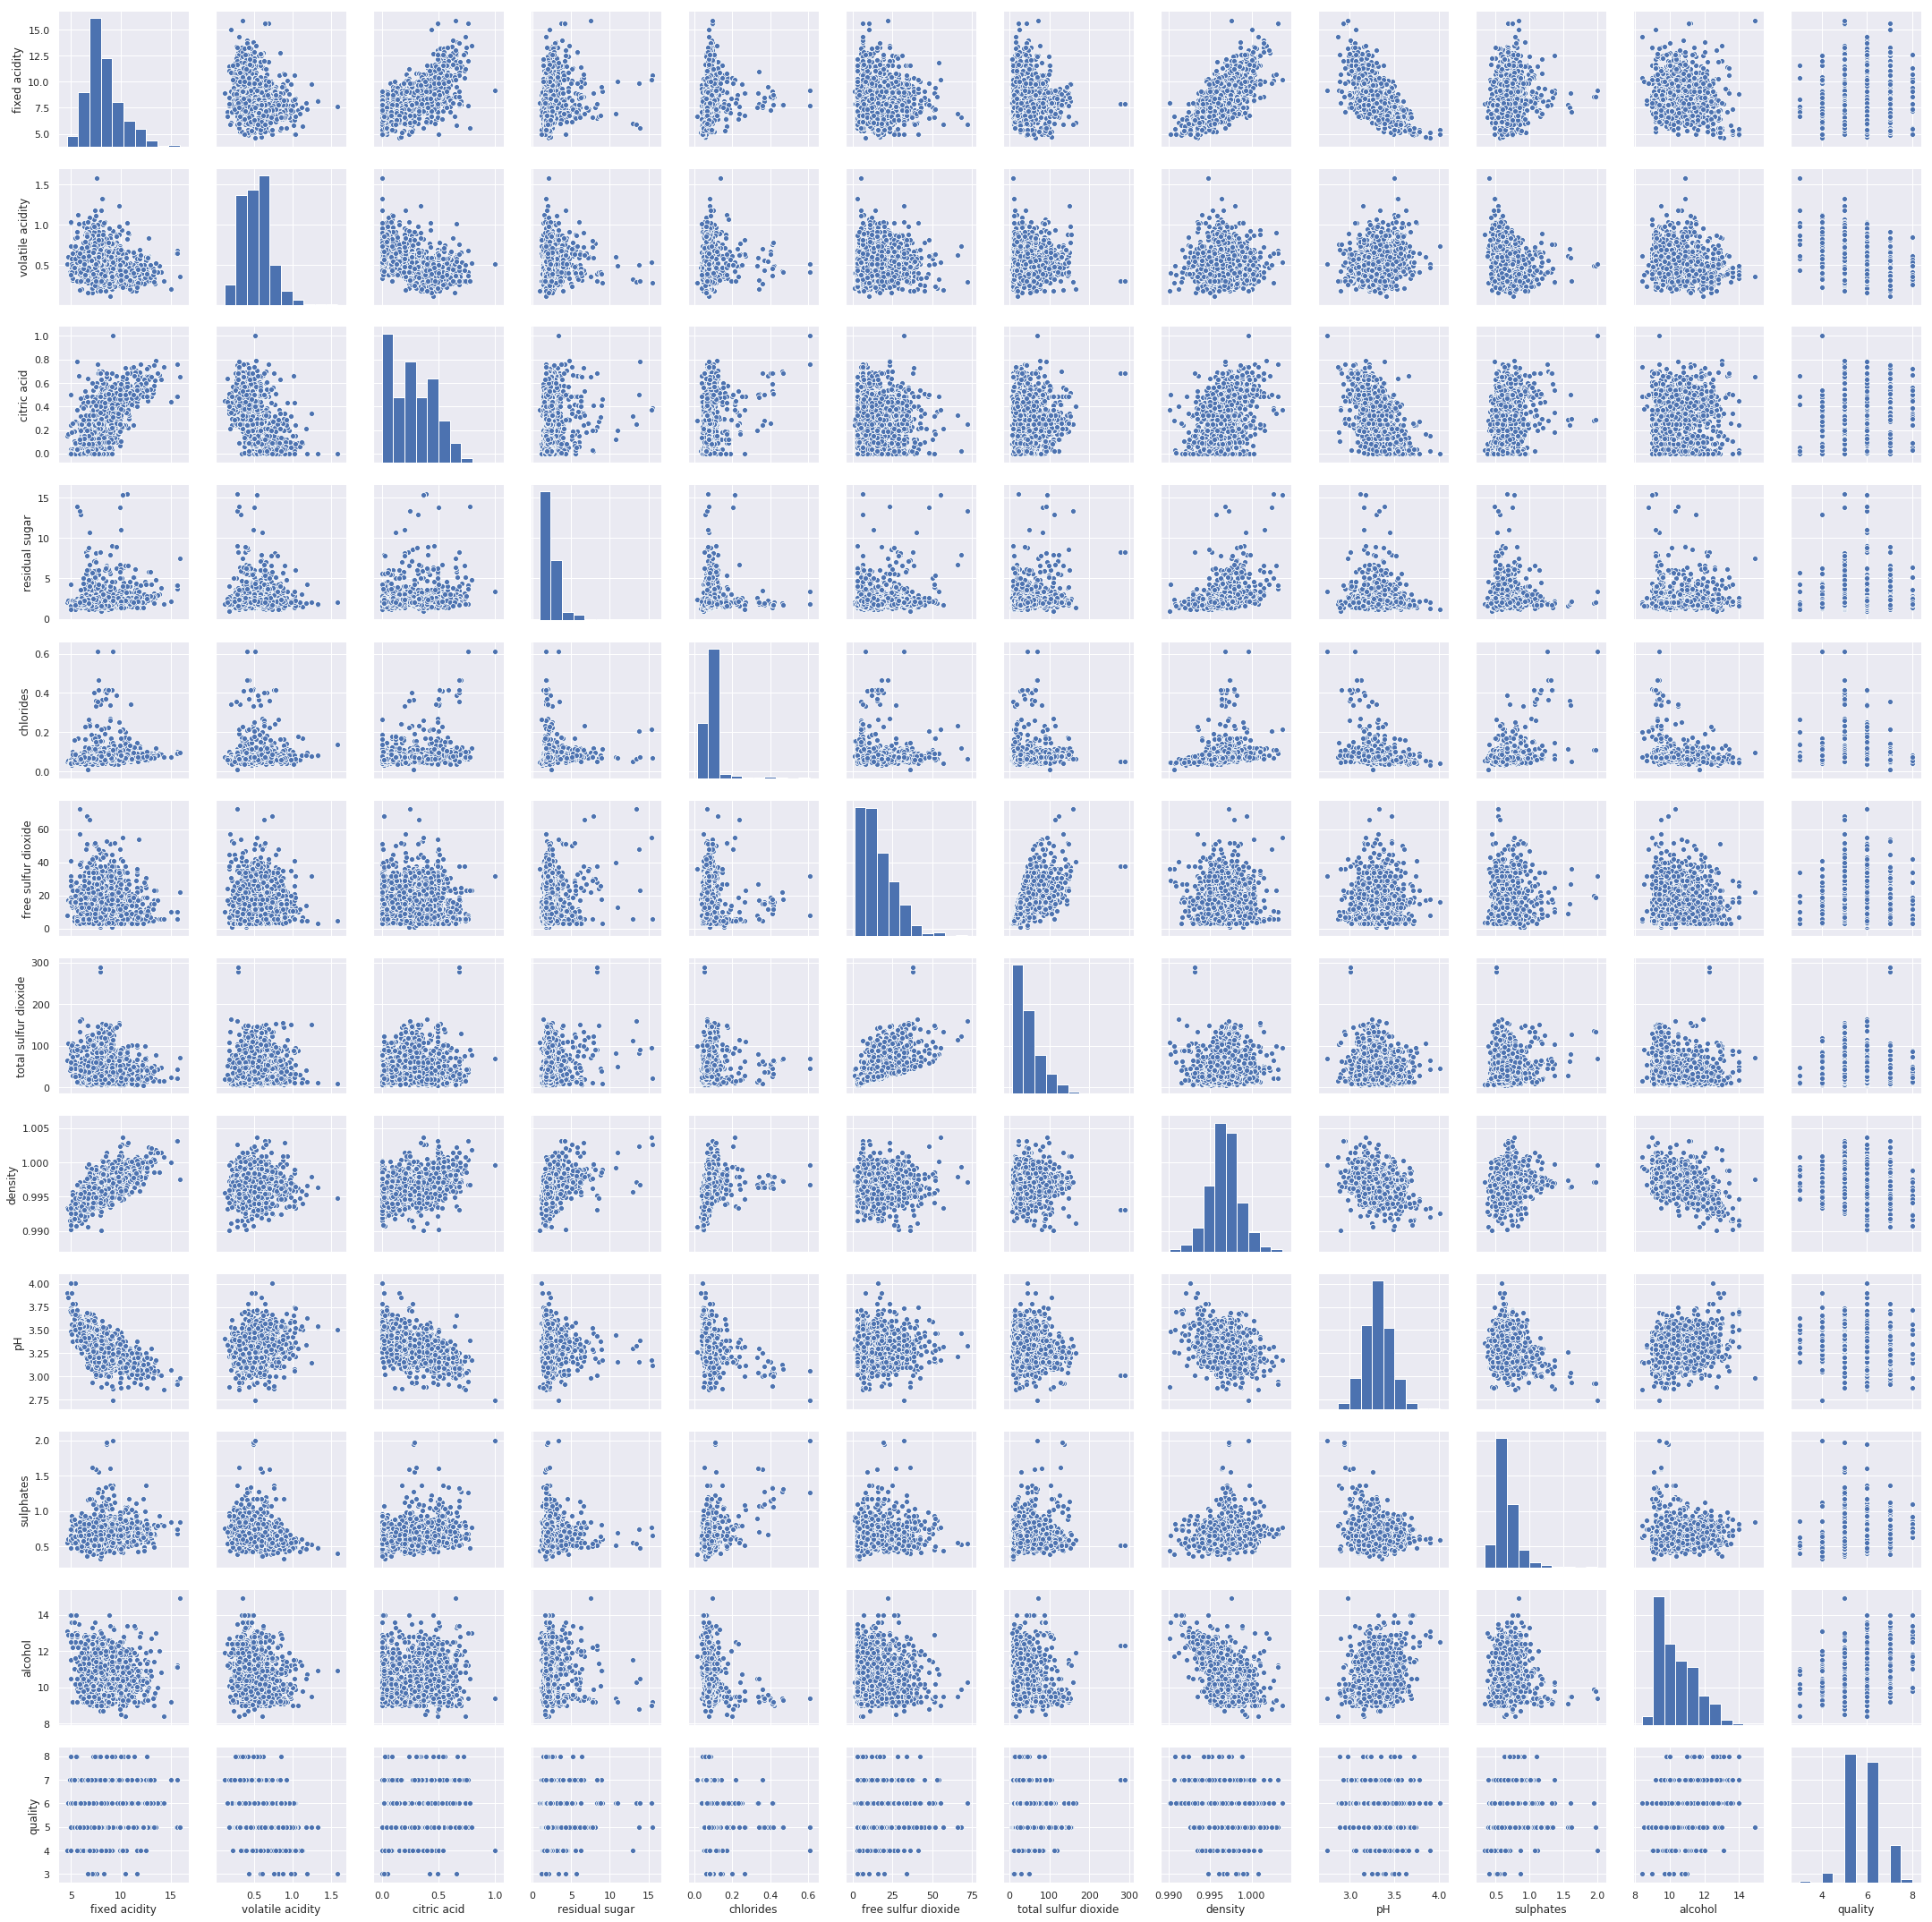

In [9]:
sns.pairplot(red_wine_df)

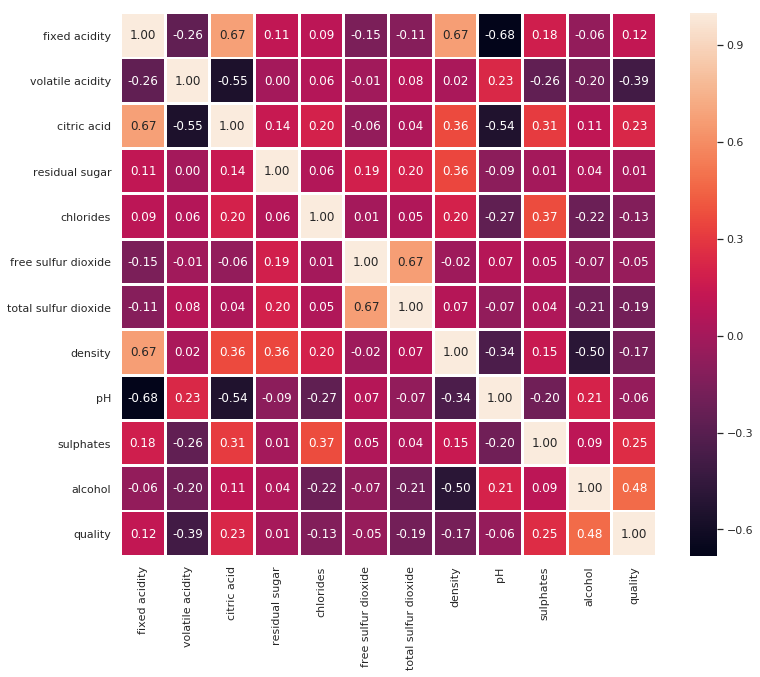

In [10]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(red_wine_df.corr(), annot=True, fmt='.2f', linewidths=2)

- Free Suplhur Dioxide and Total Sulphur Dioxide have some positive relation to Residual Sugar. On further inspection, I found that the quantity of SO2 is dependent on Sugar content. Reference : http://thewinehub.com/home/2013/01/09/the-use-or-not-of-sulfur-dioxide-in-winemaking-trick-or-treat/ . More specifically, the mentioned link states that "the lower the Residual Sugar , the less SO2 needed"  
- Density has a postive correlation with fixed acidity and residual sugar
- Density has negative correlation with alcohol and pH
- Quality has positive correlation with alcohol, citric acid and sulphates, and -ve correlation with citric acid. We need to explore this further.
- Fixed acidity has high +ve correlation with citric acid and density and -ve correlation with pH
- Residual sugar has +ve correlation with citric acid
- pH has -ve correlation with fixed acidity and citric acid, but +ve correlation with volatile acid


/home/kashif/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


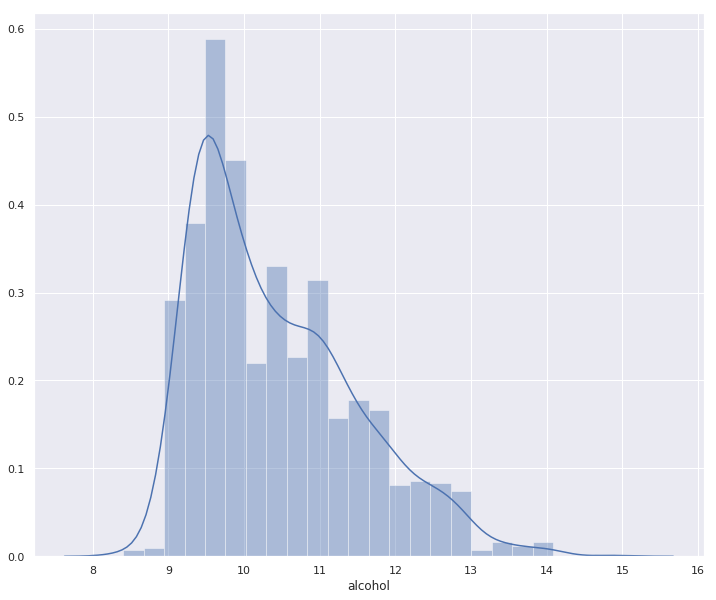

In [12]:
sns.distplot(red_wine_df['alcohol'])

In [14]:
from scipy.stats import skew
skew(red_wine_df['alcohol'])

0.8600210646566755

### Alcohol content is positively skewed

In [15]:
def draw_hist(temp_df, bin_size = 15):
    ax = sns.distplot(temp_df)
    #xmin, xmax = ax.get_xlim()
    #ax.set_xticks(np.round(np.linspace(xmin, xmax, bin_size), 2))
    plt.tight_layout()
    plt.locator_params(axis='y', nbins=6)
    plt.show()
    print("Skewness is {}".format(skew(temp_df)))
    print("Mean is {}".format(np.median(temp_df)))
    print("Median is {}".format(np.mean(temp_df)))

/home/kashif/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


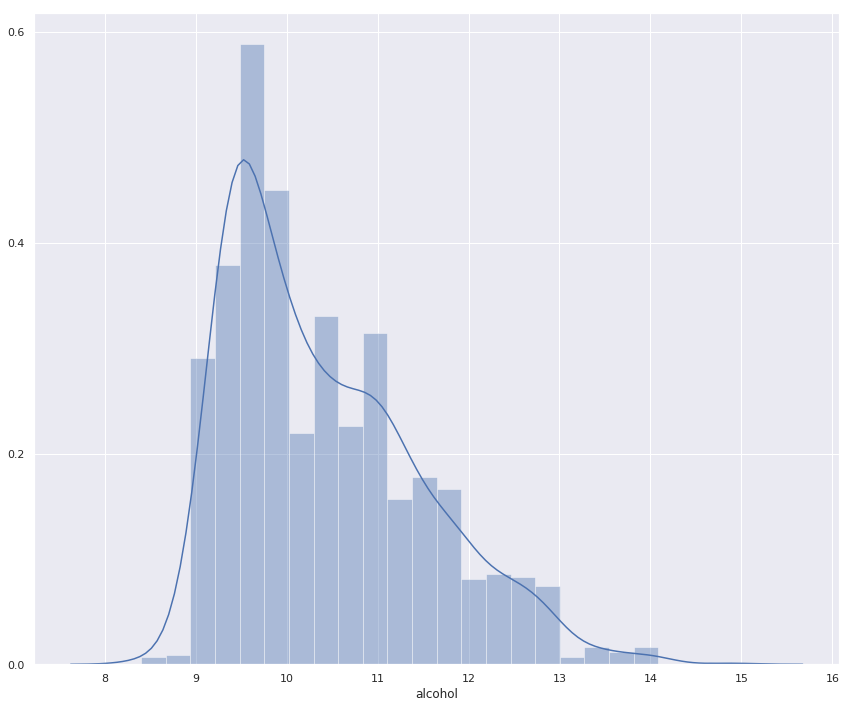

Skewness is 0.8600210646566755
Mean is 10.2
Median is 10.422983114446502


In [16]:
draw_hist(red_wine_df['alcohol'])

# Let's see how alcohol varies w.r.t. quality

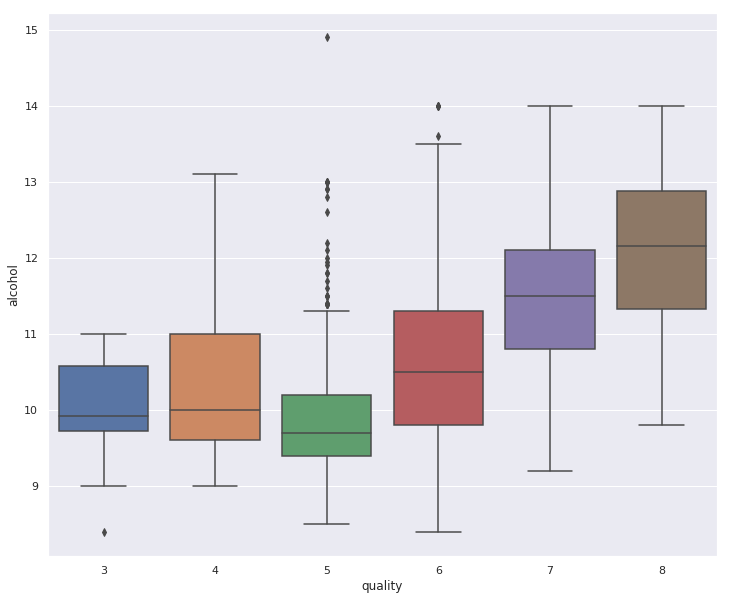

In [17]:
sns.boxplot(x='quality', y='alcohol', data=red_wine_df)

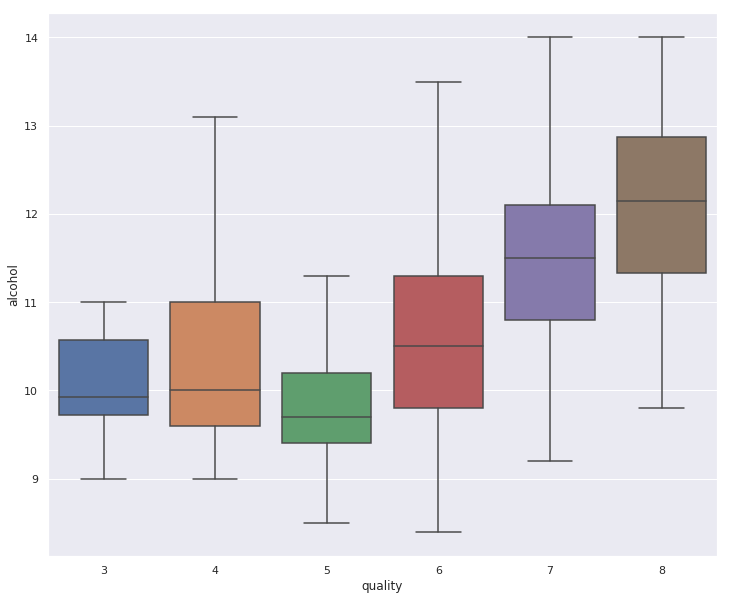

In [18]:
sns.boxplot(x='quality', y='alcohol', data=red_wine_df,
           showfliers=False)

/home/kashif/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


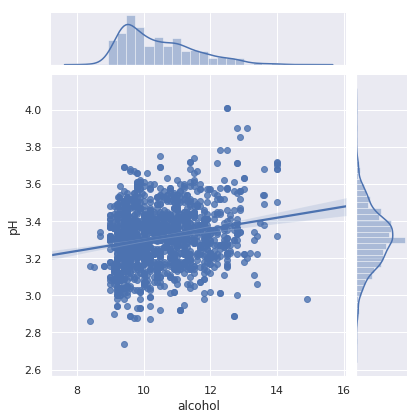

In [19]:
joint_plt = sns.jointplot(x='alcohol', y='pH', data=red_wine_df,
                        kind='reg')

In [20]:
from scipy.stats import pearsonr
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("Correlation between {} and {} is {}".format(col1, col2, pearson_corr))
    print("P-value of this correlation is {}".format(p_value))

In [21]:
get_corr('alcohol', 'pH', red_wine_df)

Correlation between alcohol and pH is 0.20563250850549822
P-value of this correlation is 9.964497741460977e-17


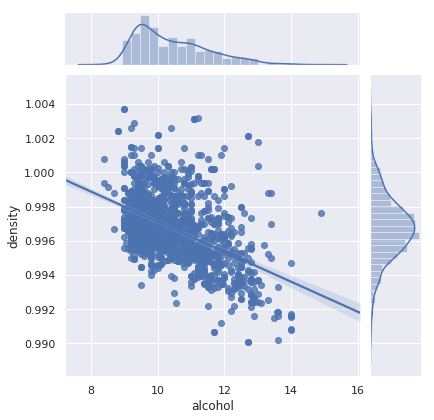

In [22]:
joint_plt = sns.jointplot(x='alcohol', y='density', data=red_wine_df,
                        kind='reg')

In [23]:
get_corr('alcohol', 'density', red_wine_df)

Correlation between alcohol and density is -0.4961797702417011
P-value of this correlation is 3.938835339991827e-100


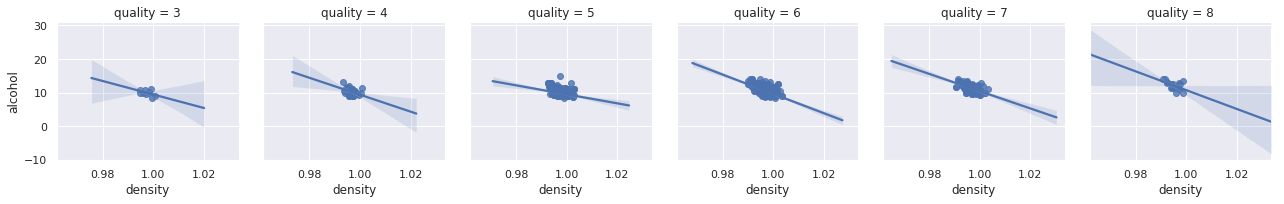

In [25]:
g = sns.FacetGrid(red_wine_df, col="quality")
g = g.map(sns.regplot, "density", "alcohol")

### Lets analyze sulphates and quality

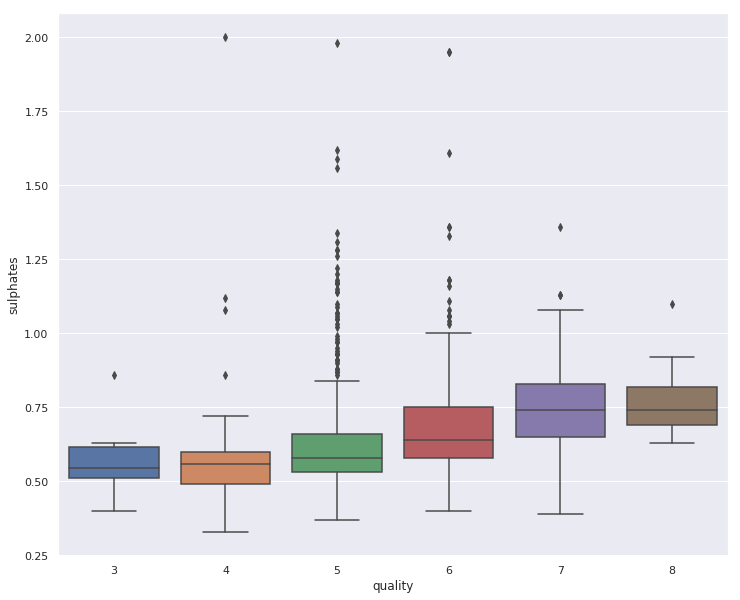

In [26]:
sns.boxplot(x='quality', y='sulphates', data=red_wine_df)

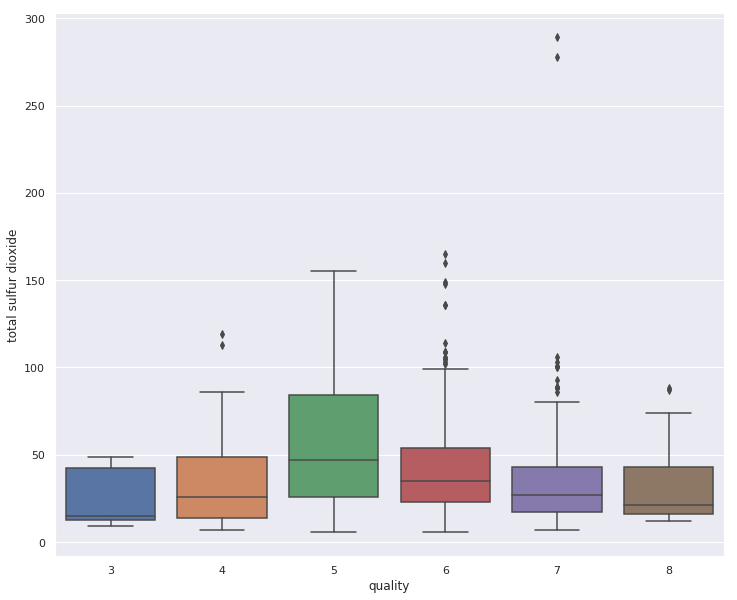

In [27]:
sns.boxplot(x='quality', y='total sulfur dioxide', data=red_wine_df)

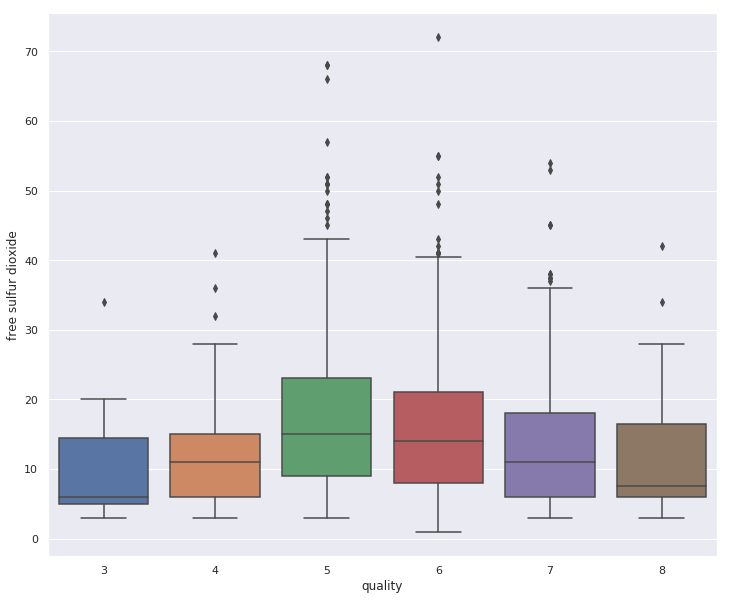

In [28]:
sns.boxplot(x='quality', y='free sulfur dioxide', data=red_wine_df)

In [ ]:
red_wine_df.columns

## Lets move on to fixed acidity,  volatile acidity and citric acid

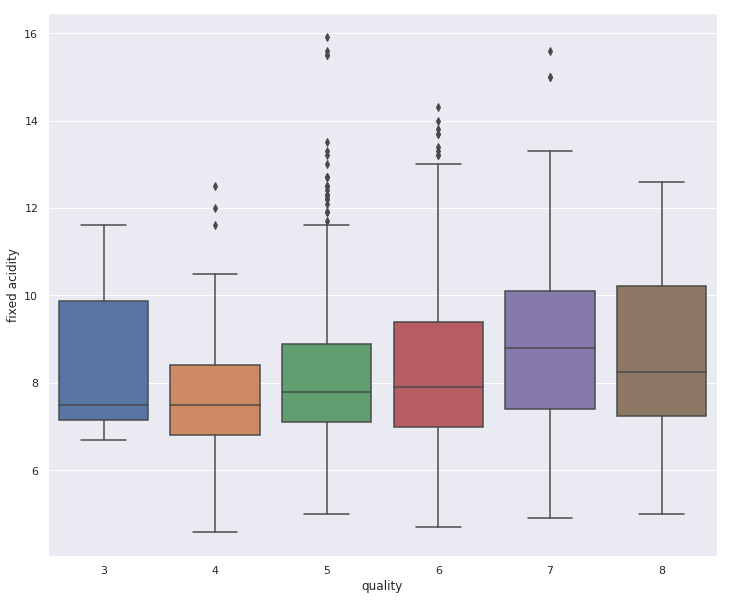

In [29]:
sns.boxplot(x='quality', y='fixed acidity', data=red_wine_df)

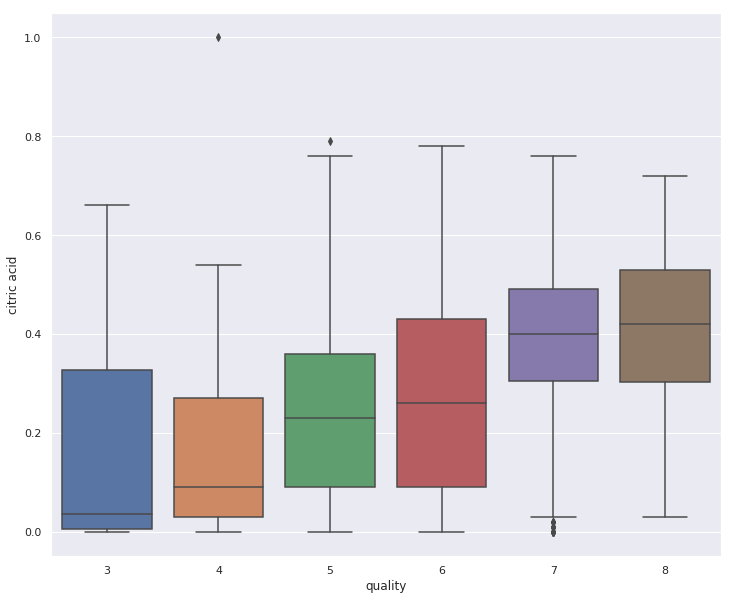

In [31]:
sns.boxplot(x='quality', y='citric acid', data=red_wine_df)

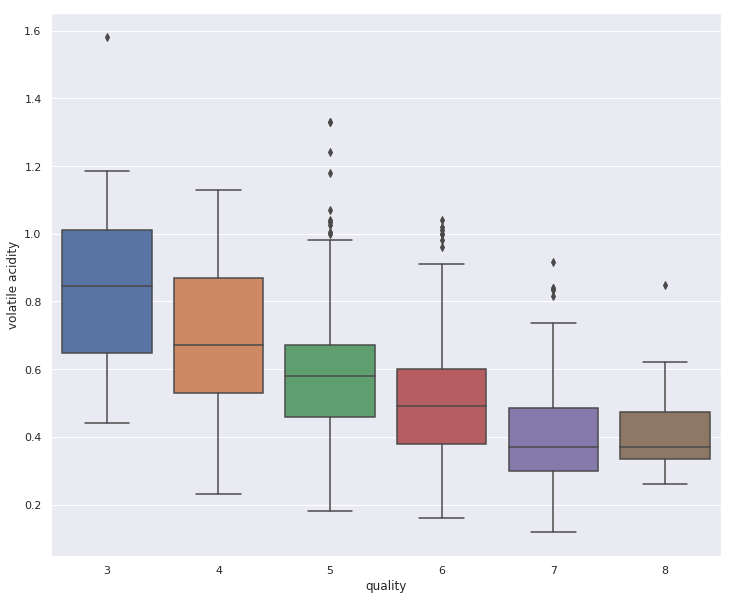

In [34]:
sns.boxplot(x='quality', y='volatile acidity', data=red_wine_df)

# Trends between other columns

In [33]:
red_wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
get_corr('pH', 'citric acid', red_wine_df)

# Create a new Column Total Acidity

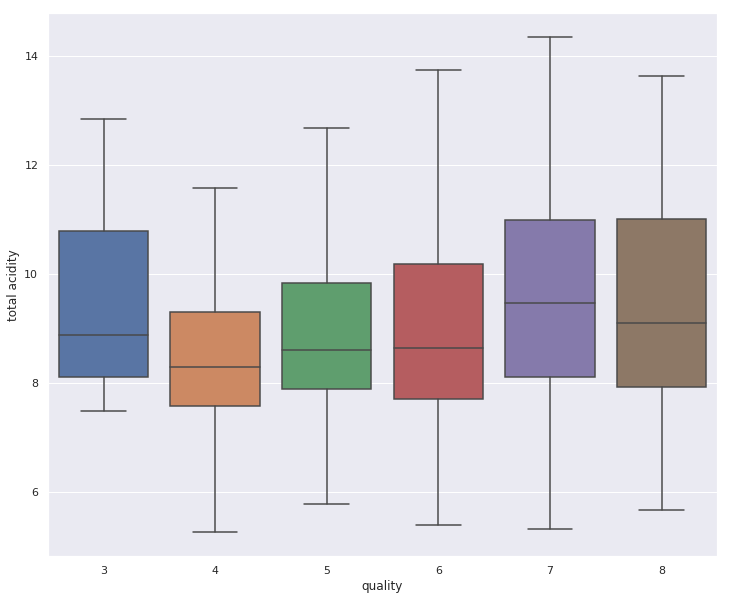

In [39]:
red_wine_df['total acidity'] = (red_wine_df['fixed acidity']+ red_wine_df['citric acid'] + red_wine_df['volatile acidity'])
sns.boxplot(x='quality', y='total acidity', data=red_wine_df,
           showfliers=False)

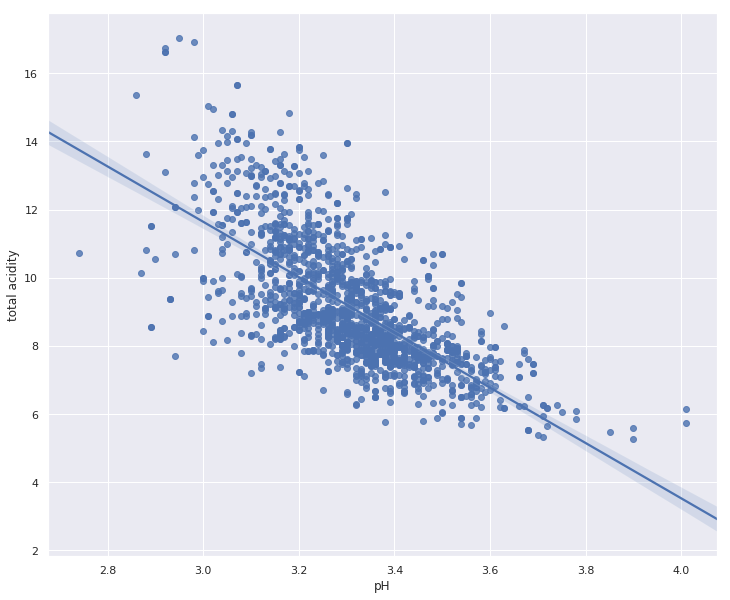

In [40]:
sns.regplot(x='pH', y='total acidity', data=red_wine_df)

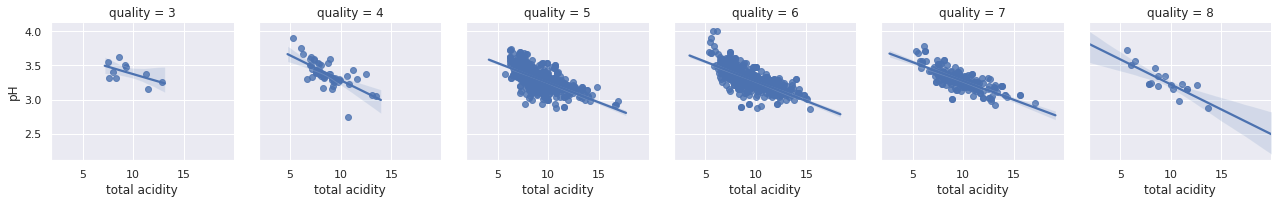

In [41]:
g = sns.FacetGrid(red_wine_df, col="quality")
g = g.map(sns.regplot, "total acidity", "pH")

In [ ]:
get_corr('total acidity', 'pH', red_wine_df)

In [ ]:
g = sns.FacetGrid(red_wine_df, col="quality")
g = g.map(sns.regplot, "free sulfur dioxide", "pH")